In [1]:
# birdy client for communication with the server:
from birdy import WPSClient
# import birdy 

# handling files and folders
from os import path, listdir
from urllib import request
import time

# to display external png graphics in notebook: 
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# on serverside :
# conda activate finch 
# finch start -c etc/custom.cfg 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)


In [7]:
# read in the existing Indices based on bias_adjusted tas files:
tas_bbox = '/home/nils/nap_niger/data/adjust/indices/'
tasInd_bbox = [ tas_bbox+f for f in listdir(tas_bbox) if '.nc' in f ]
tas_NER = '/home/nils/nap_niger/data/adjust/NER/'
tasInd_NER = [ tas_NER+f for f in listdir(tas_NER) if '.nc' in f ]


# read in the existing Indices based on pr files (!!! not bias adjusted, so far !!!):
pr_bbox = '/home/nils/nap_niger/data/bbox/indices/'
prInd_bbox = [ pr_bbox+f for f in listdir(pr_bbox) if '.nc' in f ]
pr_NER = '/home/nils/nap_niger/data/bbox/NER/'
prInd_NER = [ pr_NER+f for f in listdir(pr_NER) if '.nc' in f ]


tasInd_NER.sort()
tasInd_bbox.sort()
prInd_bbox.sort()
prInd_NER.sort()


print(len(tasInd_bbox), len(tasInd_NER))
print(len(prInd_bbox), len(prInd_NER))


18 18
114 114


In [58]:
# Caluclated indices
# frequencies
freq=['yr','mon']

# precipitation indices
pr_indices = ['prcptot','rx1day','wetdays','cdd','cwd','sdii','rx5day']
tas_indices = ['tg-mean']

titles = ['Somme annuelle des précipitations', 
          'Jours de plus fortes précipitations',
          'Nombre de jours humide',
          'Journées consécutives de sécheresse', 
          'Jours humides consécutifs', 
          "Index d'intensité de précipitations", 
          'Somme max. sur 5 jours consécutifs', 
          'Températures moyennes annuelles']

dates = ['1976-01-01', '2005-12-31', '2036-01-01', '2065-12-31', '2071-01-01', '2099-12-30']

In [78]:
# read in the existing Indices based on pr files (!!! not bias adjusted, so far !!!):
# pr_bbox = '/home/nils/nap_niger/data/bbox/indices/'
# prInd_bbox = [ pr_bbox+f for f in listdir(pr_bbox) if '.nc' in f ]

tas_NER = '/home/nils/nap_niger/data/adjust/NER/'
tasInd_NER = [ tas_NER+f for f in listdir(tas_NER) if '.nc' in f ]

pr_NER = '/home/nils/nap_niger/data/bbox/NER/'
prInd_NER = [ pr_NER+f for f in listdir(pr_NER) if '.nc' in f ]

i = 6
indicie = pr_indices[i]

resource = [f for f in prInd_NER if indicie in f ] # and '_yr_' in f


In [79]:

out = fp_i.plot_uncertaintyrcp(resource=resource, title=titles[i], # delta = -273.15,
                            figsize='9,5', # ymin=20, ymax=100  # 
                           )

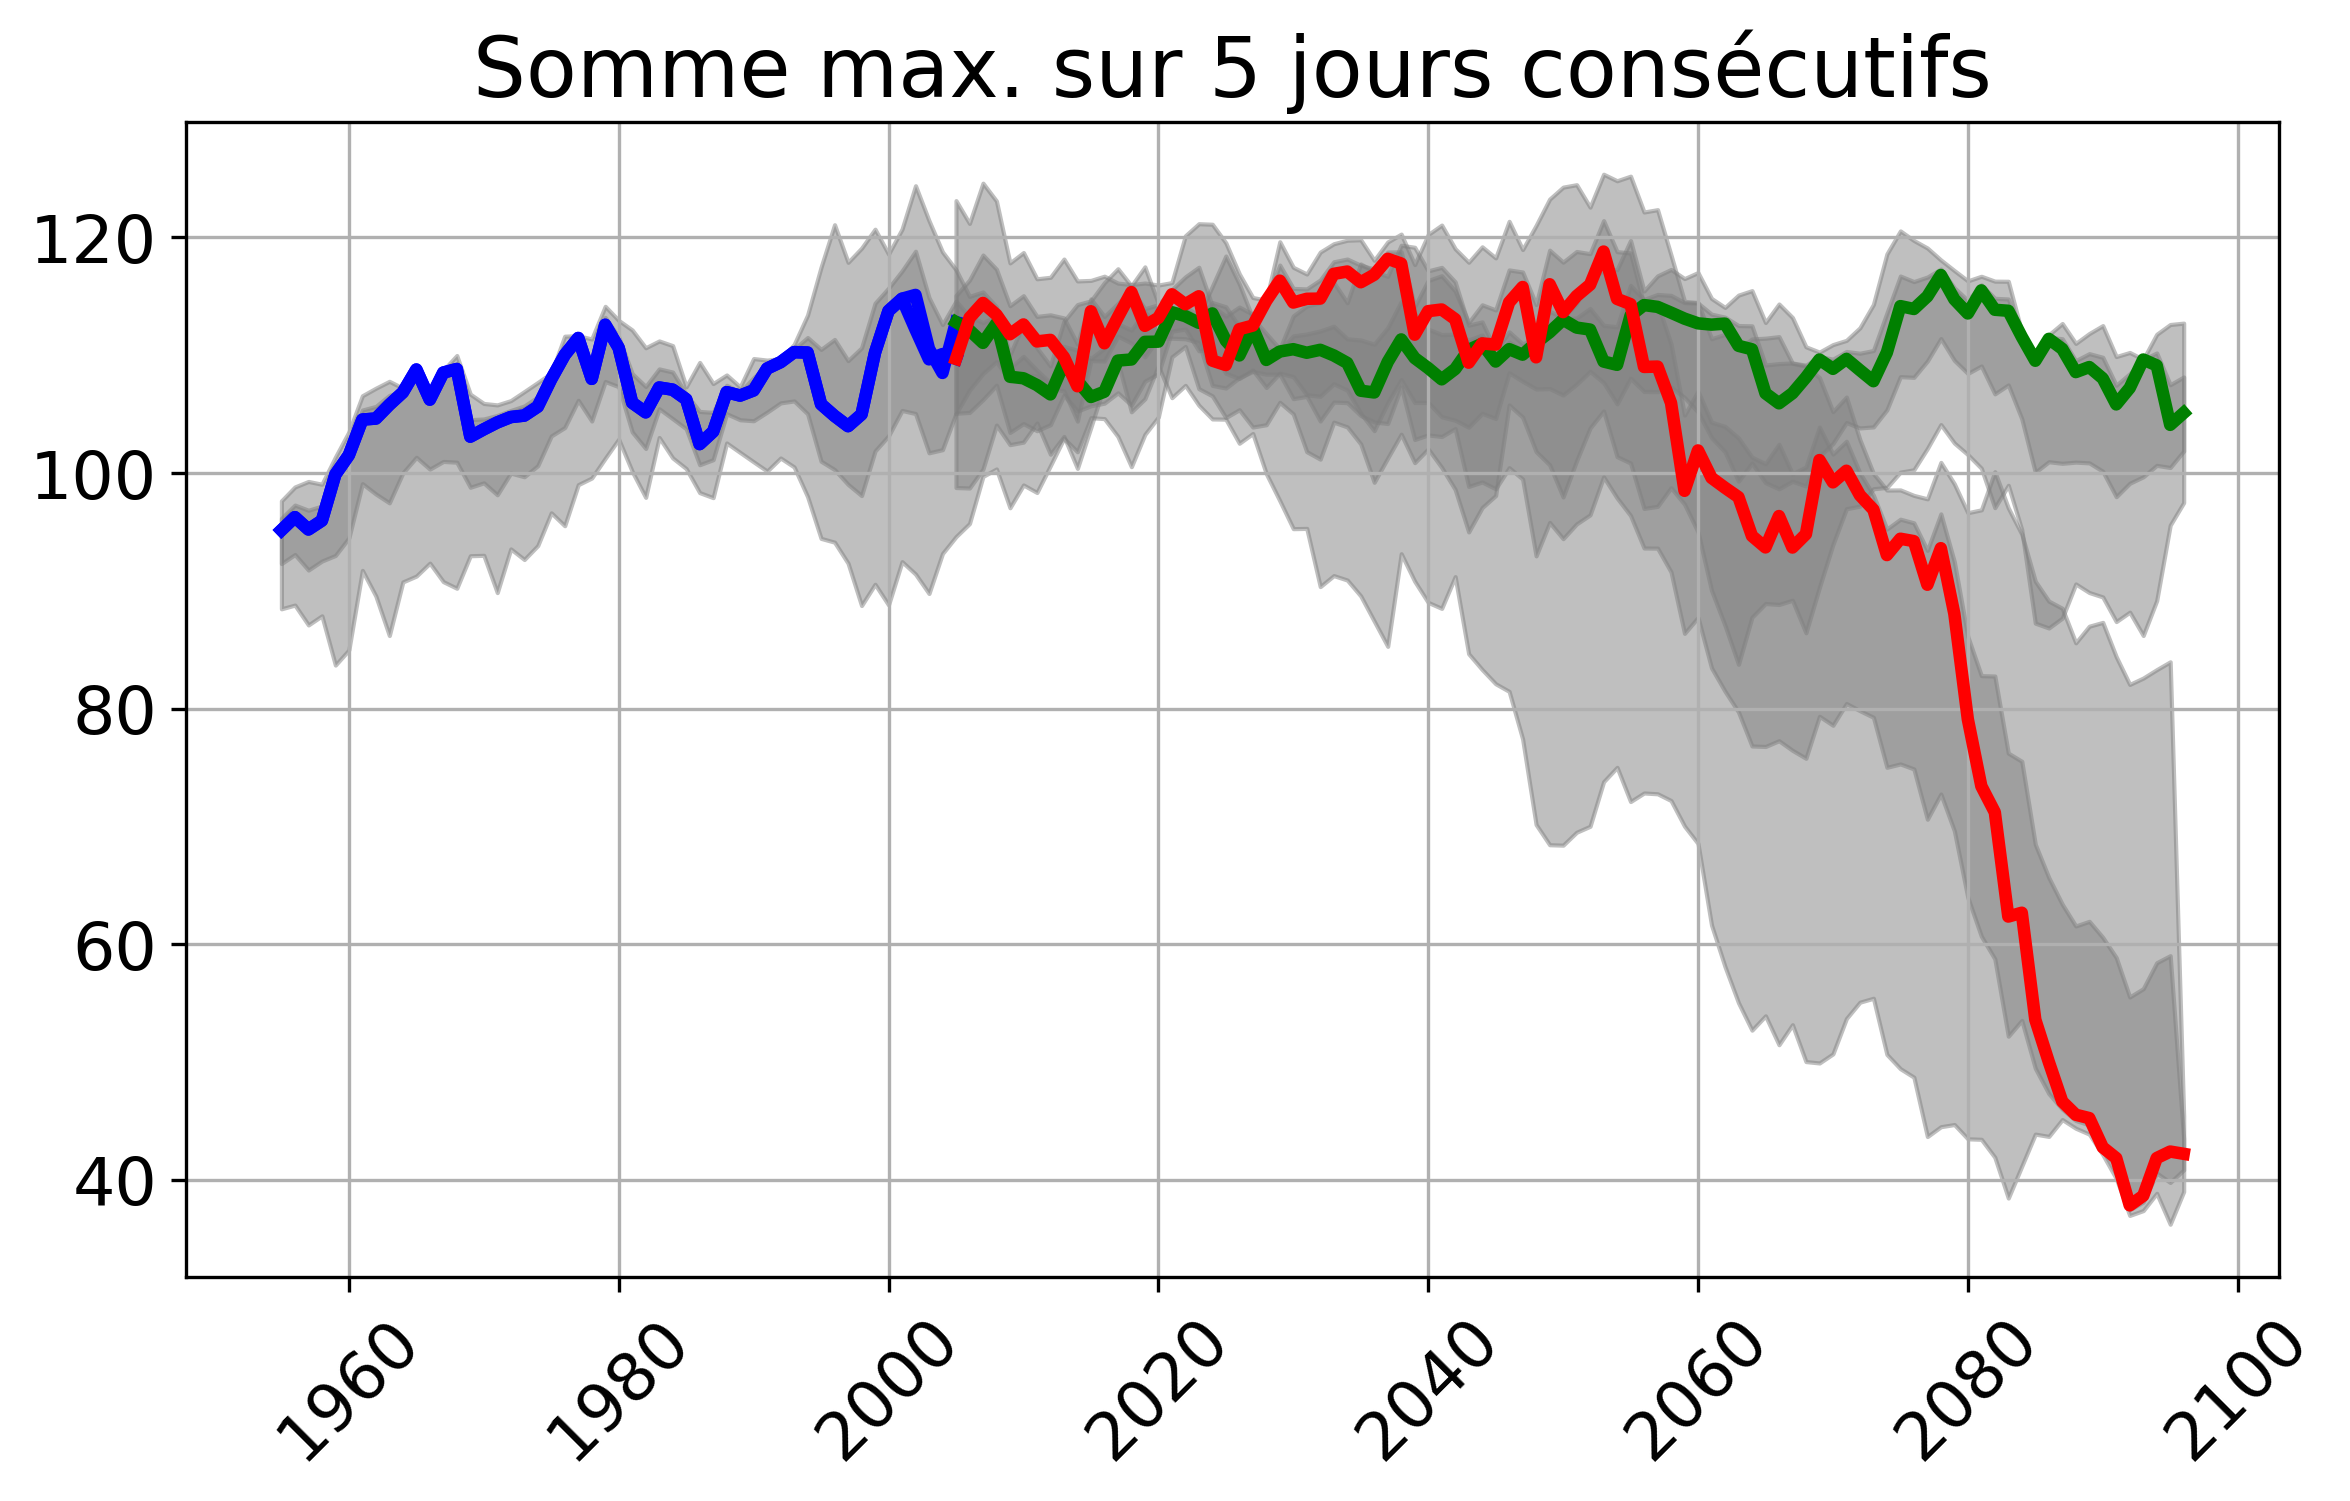

In [80]:
out_file = '/home/nils/nap_niger/pics/ts_uncertainty_{}.png'.format(indicie)

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=400)

In [81]:
out = fp_i.plot_spaghetti(resource=resource, # title=titles[i], # delta = -273.15,
                           # figsize='9,5',# ymin=0, ymax=14  # 
                         )

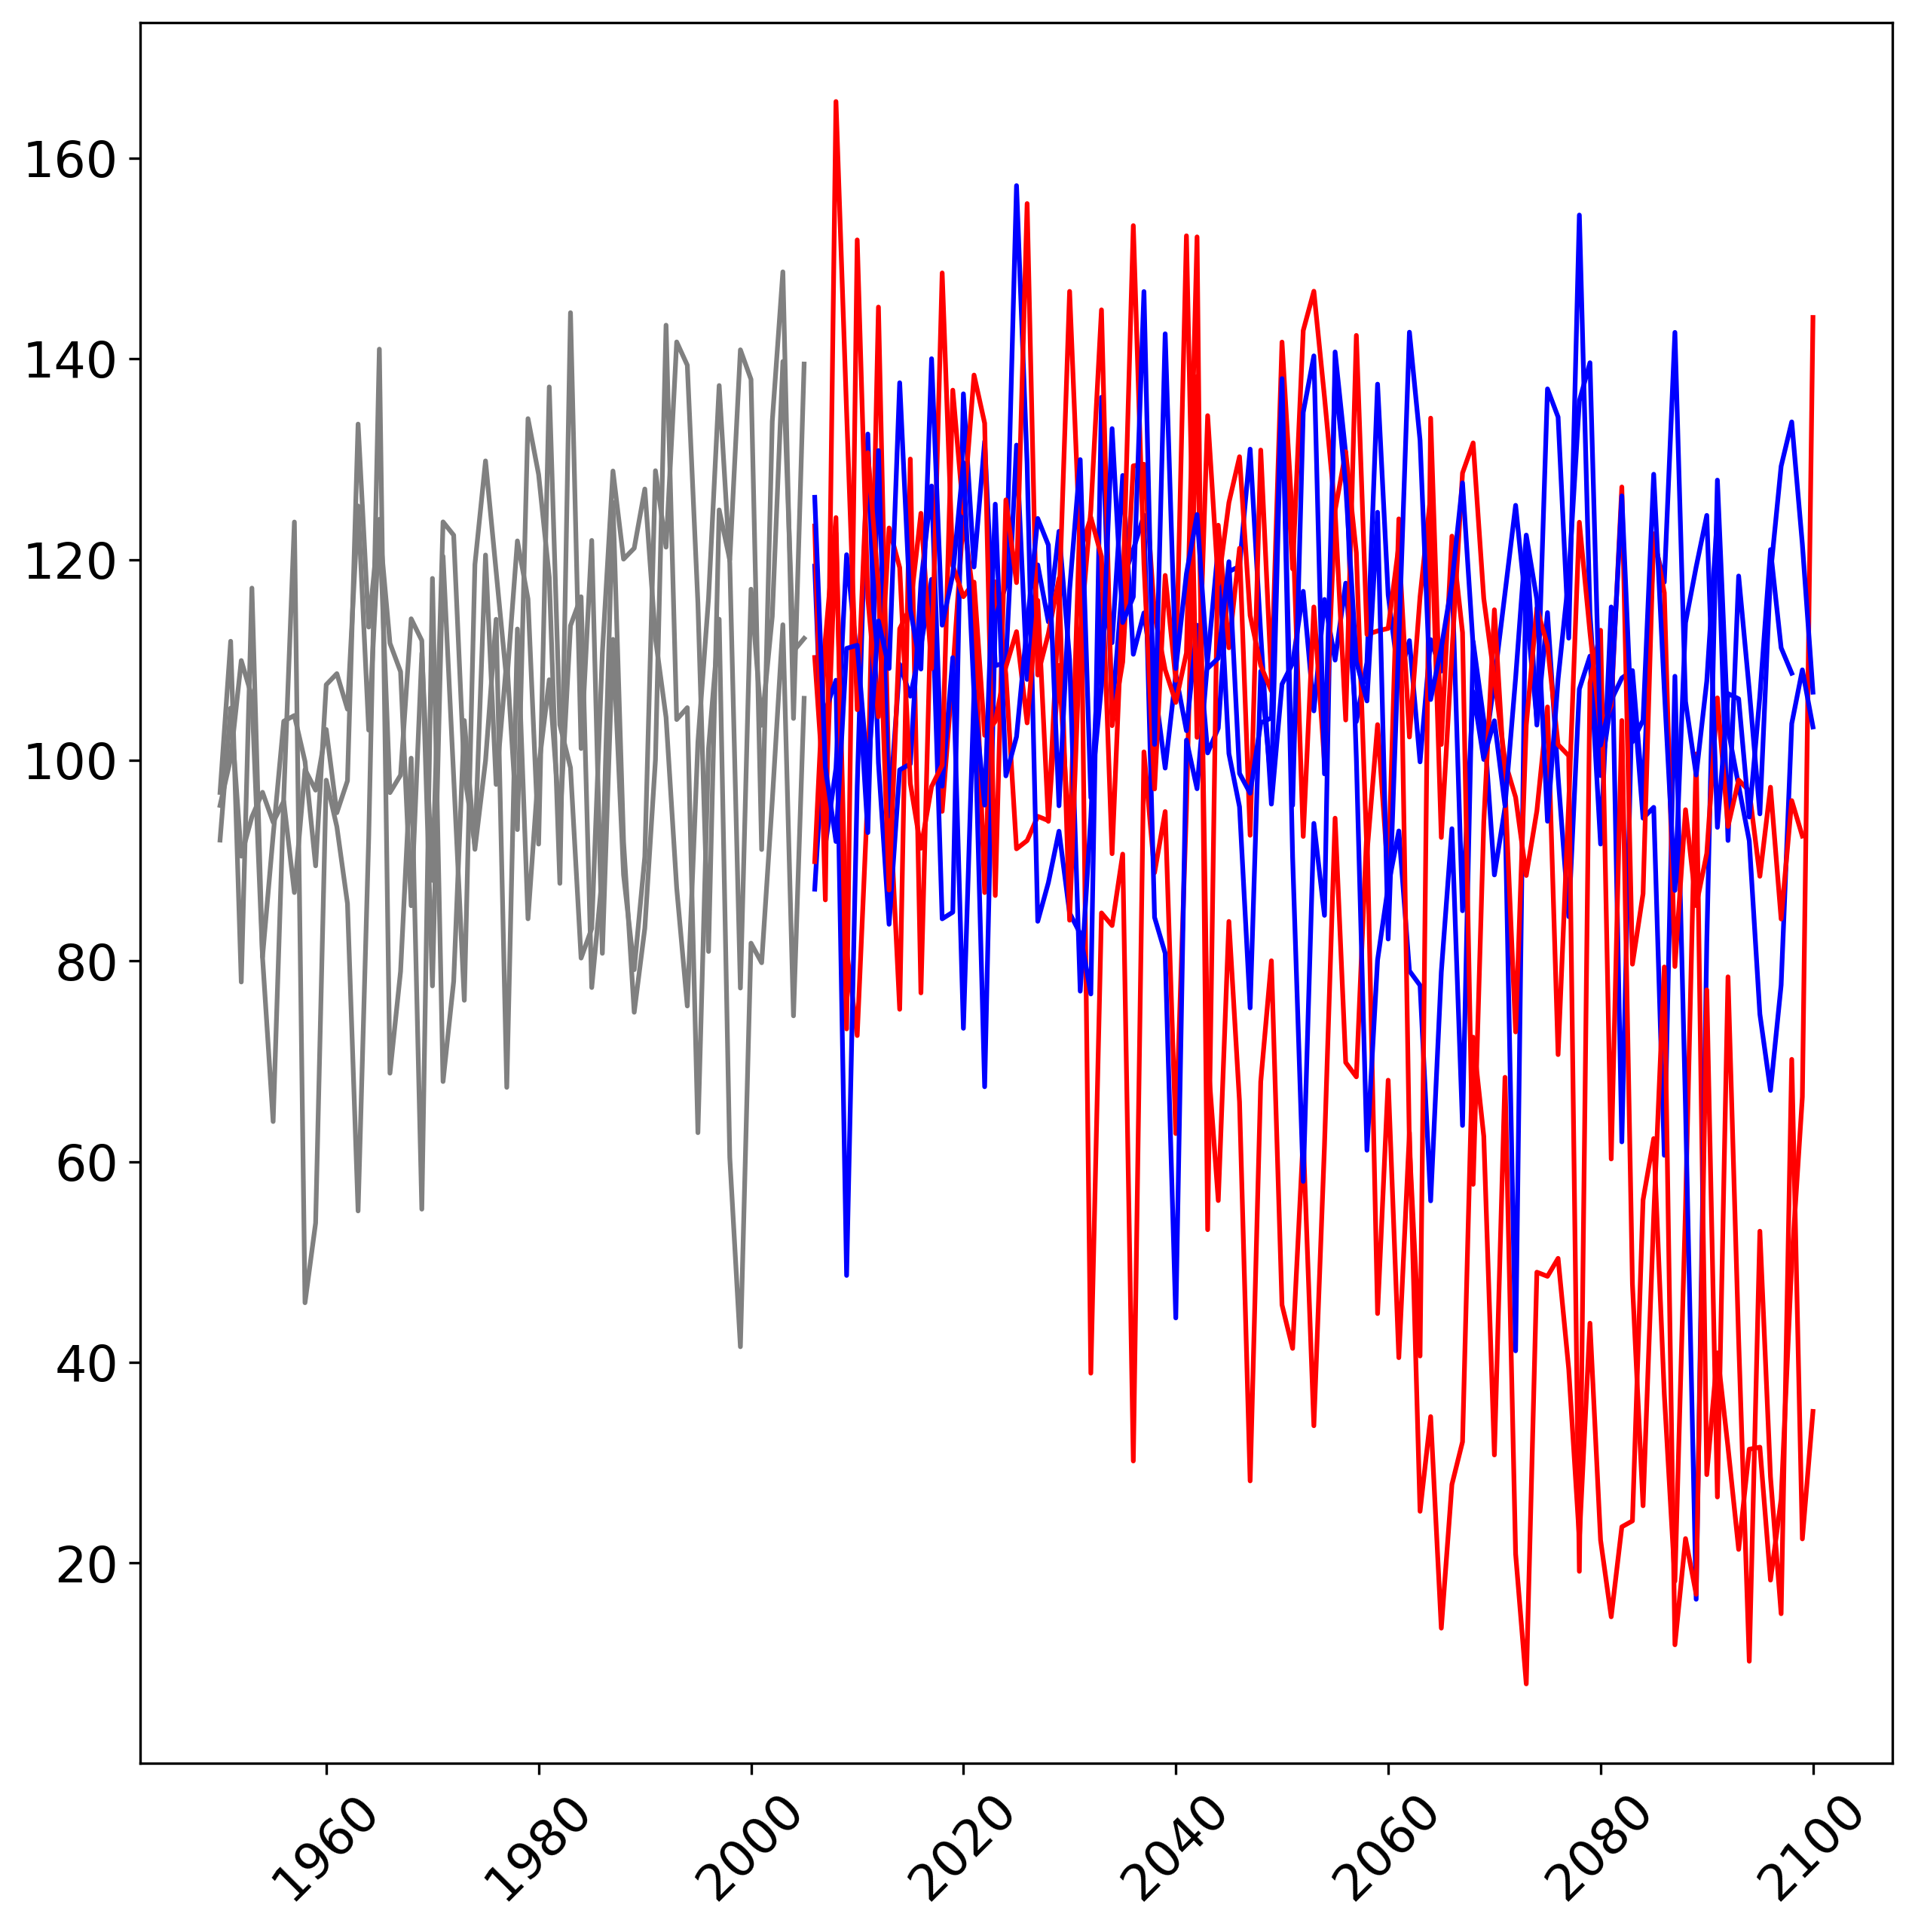

In [82]:
Image(out.get()[0], width=400)

In [83]:

hist = [f for f in resource if 'historical' in f]
out = fp_i.plot_map_timemean(resource=hist, title='Référnence historique (1971-2000)',
                             vmin=0,  vmax=130, # figsize='7,7', # delta = -273.15,
                             datestart='1971-01-01', dateend='2000-12-31',
                             cmap='Blues') # 


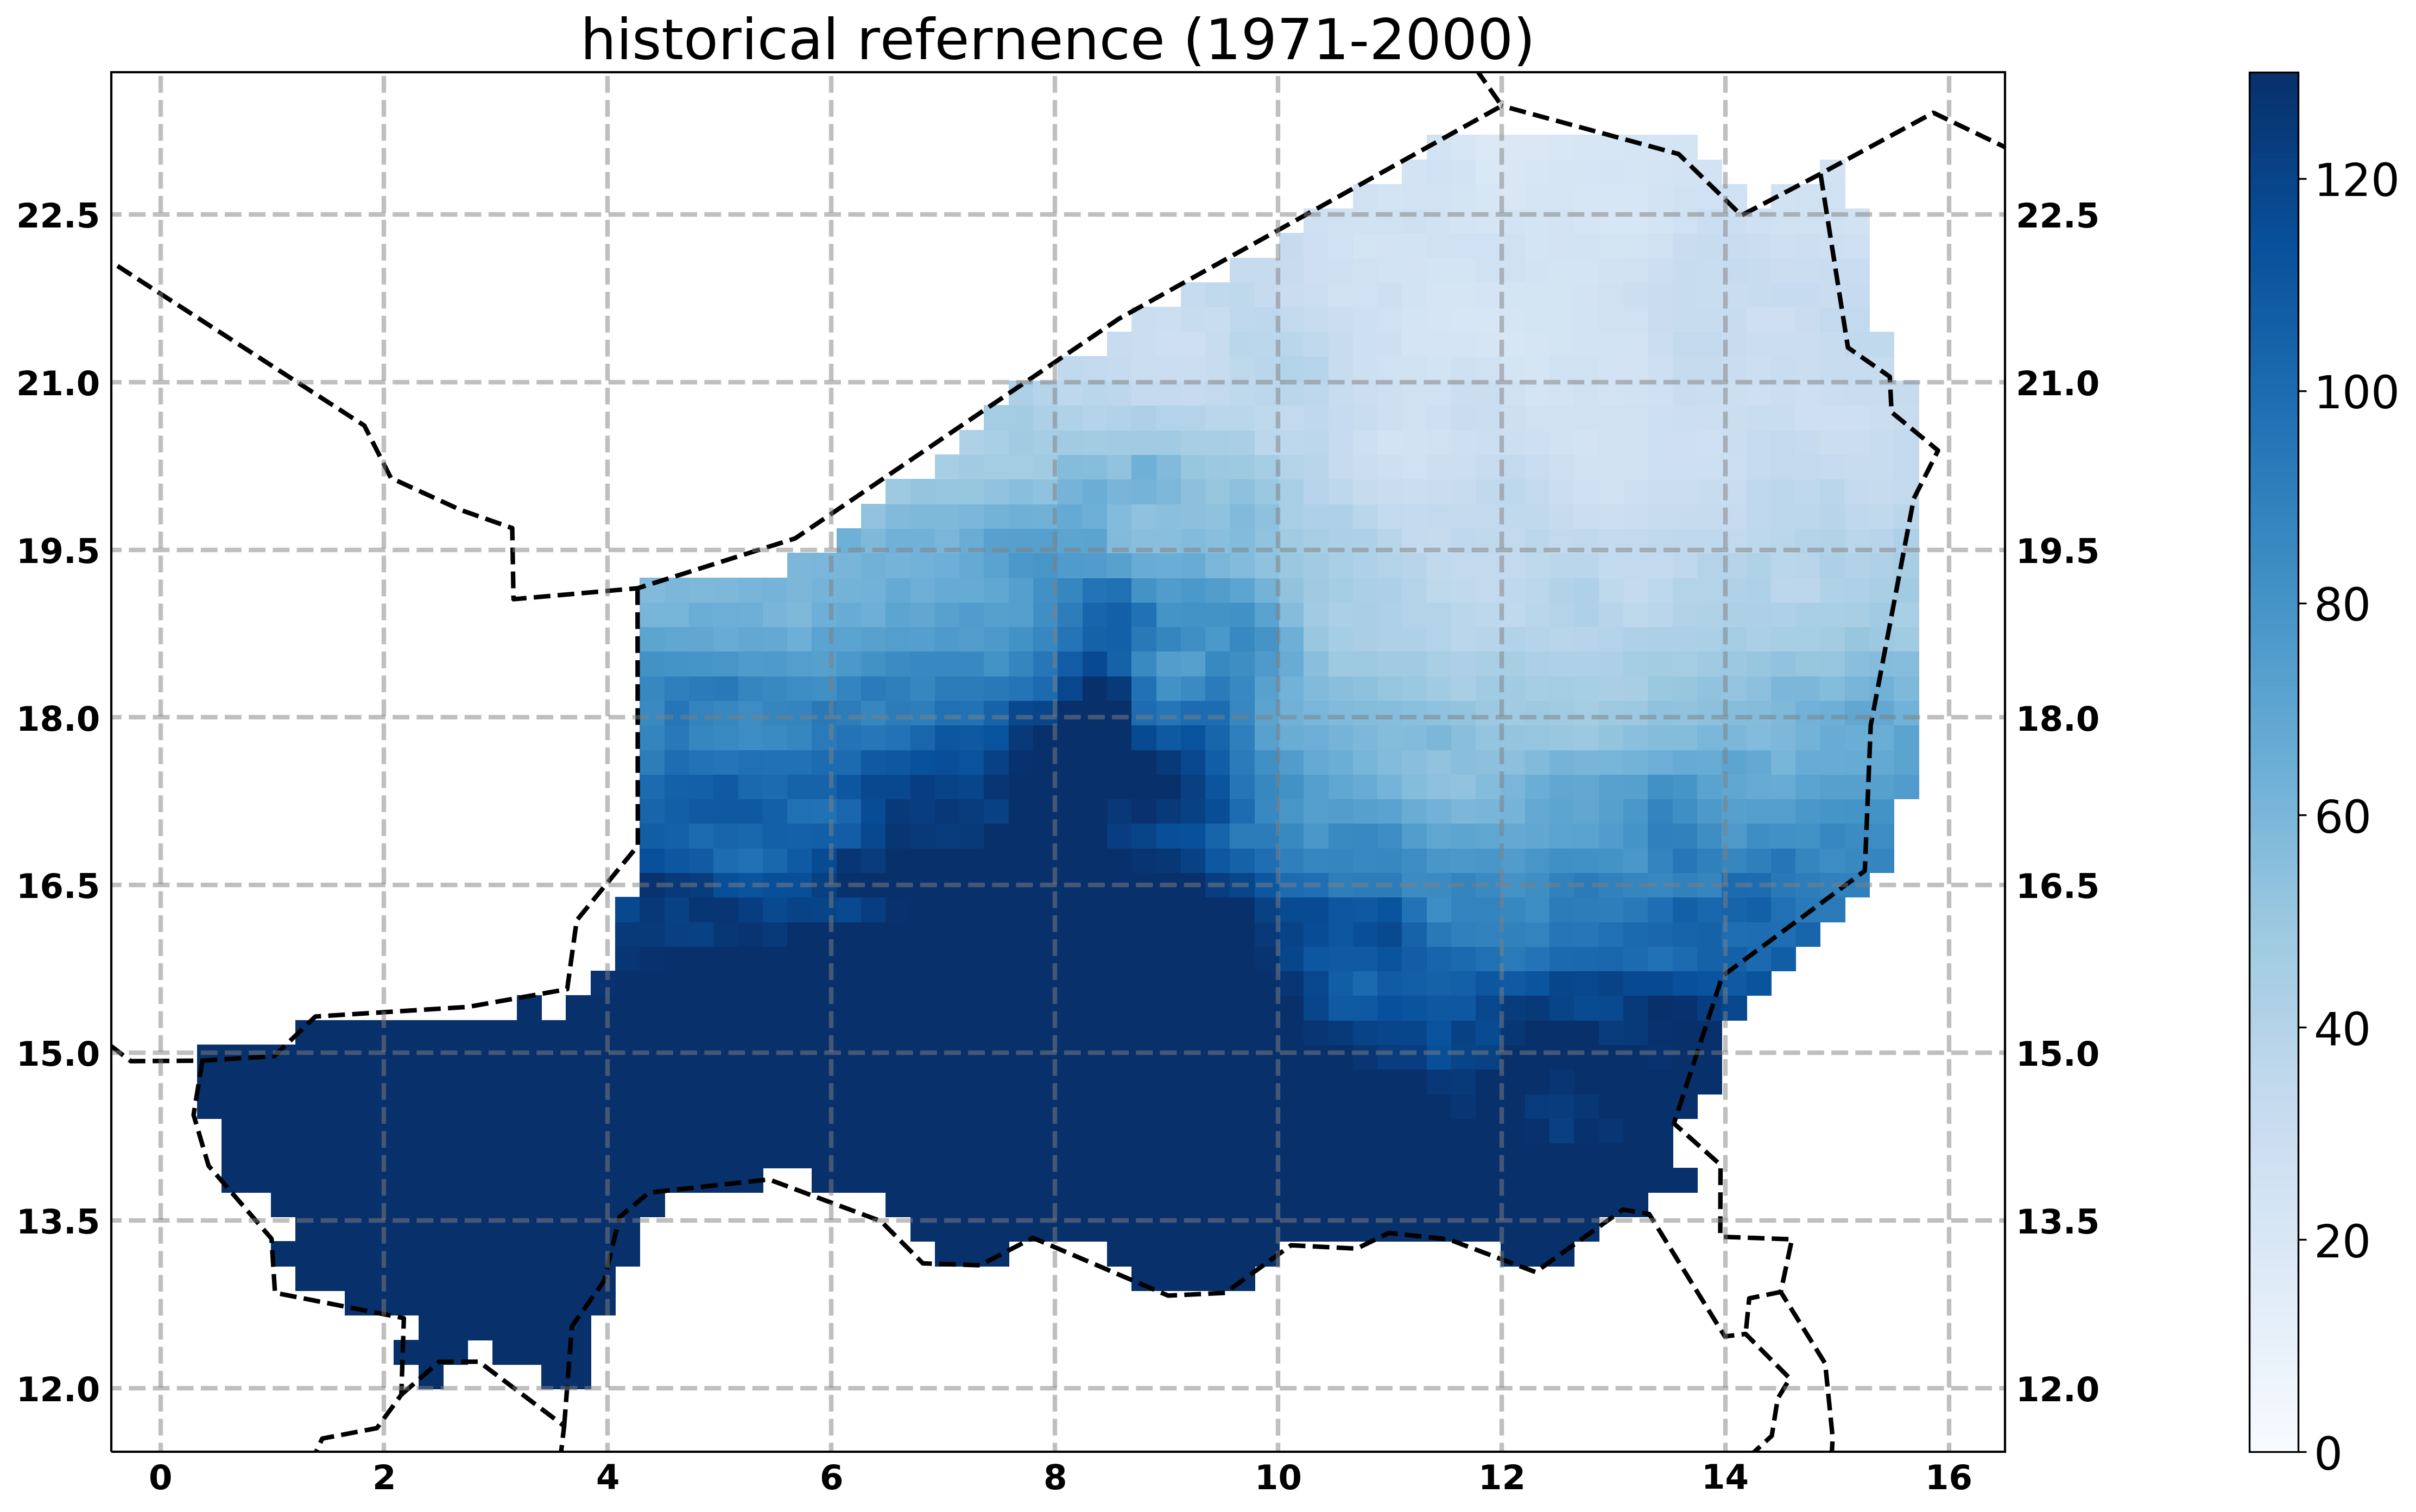

In [84]:
out_file = '/home/nils/nap_niger/pics/ref_historical_{}.png'.format(indicie)

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=400)


In [105]:
# read in the existing Indices based on pr files (!!! not bias adjusted, so far !!!):
pr_bbox = '/home/nils/nap_niger/data/bbox/indices/'
prInd_bbox = [ pr_bbox+f for f in listdir(pr_bbox) if '.nc' in f ]
pr_NER = '/home/nils/nap_niger/data/NER/indices/'
prInd_NER = [ pr_NER+f for f in listdir(pr_NER) if '.nc' in f ]


tas_bbox = '/home/nils/nap_niger/data/adjust/indices/'
tasInd_bbox = [ tas_bbox+f for f in listdir(tas_bbox) if '.nc' in f ]


futures = ['2036-2065', '2071-2100']
dates = ['1971-01-01', '2000-12-31', '2036-01-01', '2065-12-31', '2071-01-01', '2100-12-31']

pr_indices = ['prcptot','rx1day','wetdays','cdd','cwd','sdii','rx5day']
tas_indices = ['tg-mean']


# find the corresponding files 
# indicie = pr_indices[5]

fr = freq[0]
indicie= 'tg_mean' # pr_indices[5] # 

experiment = 'rcp26'
datestart_proj=dates[4],
dateend_proj=dates[5]
future = futures[1]


ref = [f for f in tasInd_bbox if indicie in f  and 'historical' in f] # and fr in f
proj = [f for f in tasInd_bbox if indicie in f and experiment in f]

ref.sort()
proj.sort()

# ref = [f for f in tasInd_bbox if indicie in f and fr in f and 'historical' in f]
# proj = [f for f in tasInd_bbox if indicie in f and fr in f and experiment in f]


out = fp_i.climatechange_signal(resource_ref=ref[0:5],
                                resource_proj=proj[0:5],
                                variable=indicie,
                                title='Scenario {} {} ({})'.format(experiment, indicie,future ),
                                datestart_ref=dates[0],
                                dateend_ref=dates[1],
                                datestart_proj=datestart_proj,
                                dateend_proj=dateend_proj,
                                vmin=0 , vmax=7,
#                                 cmap='BrBG'
                               )

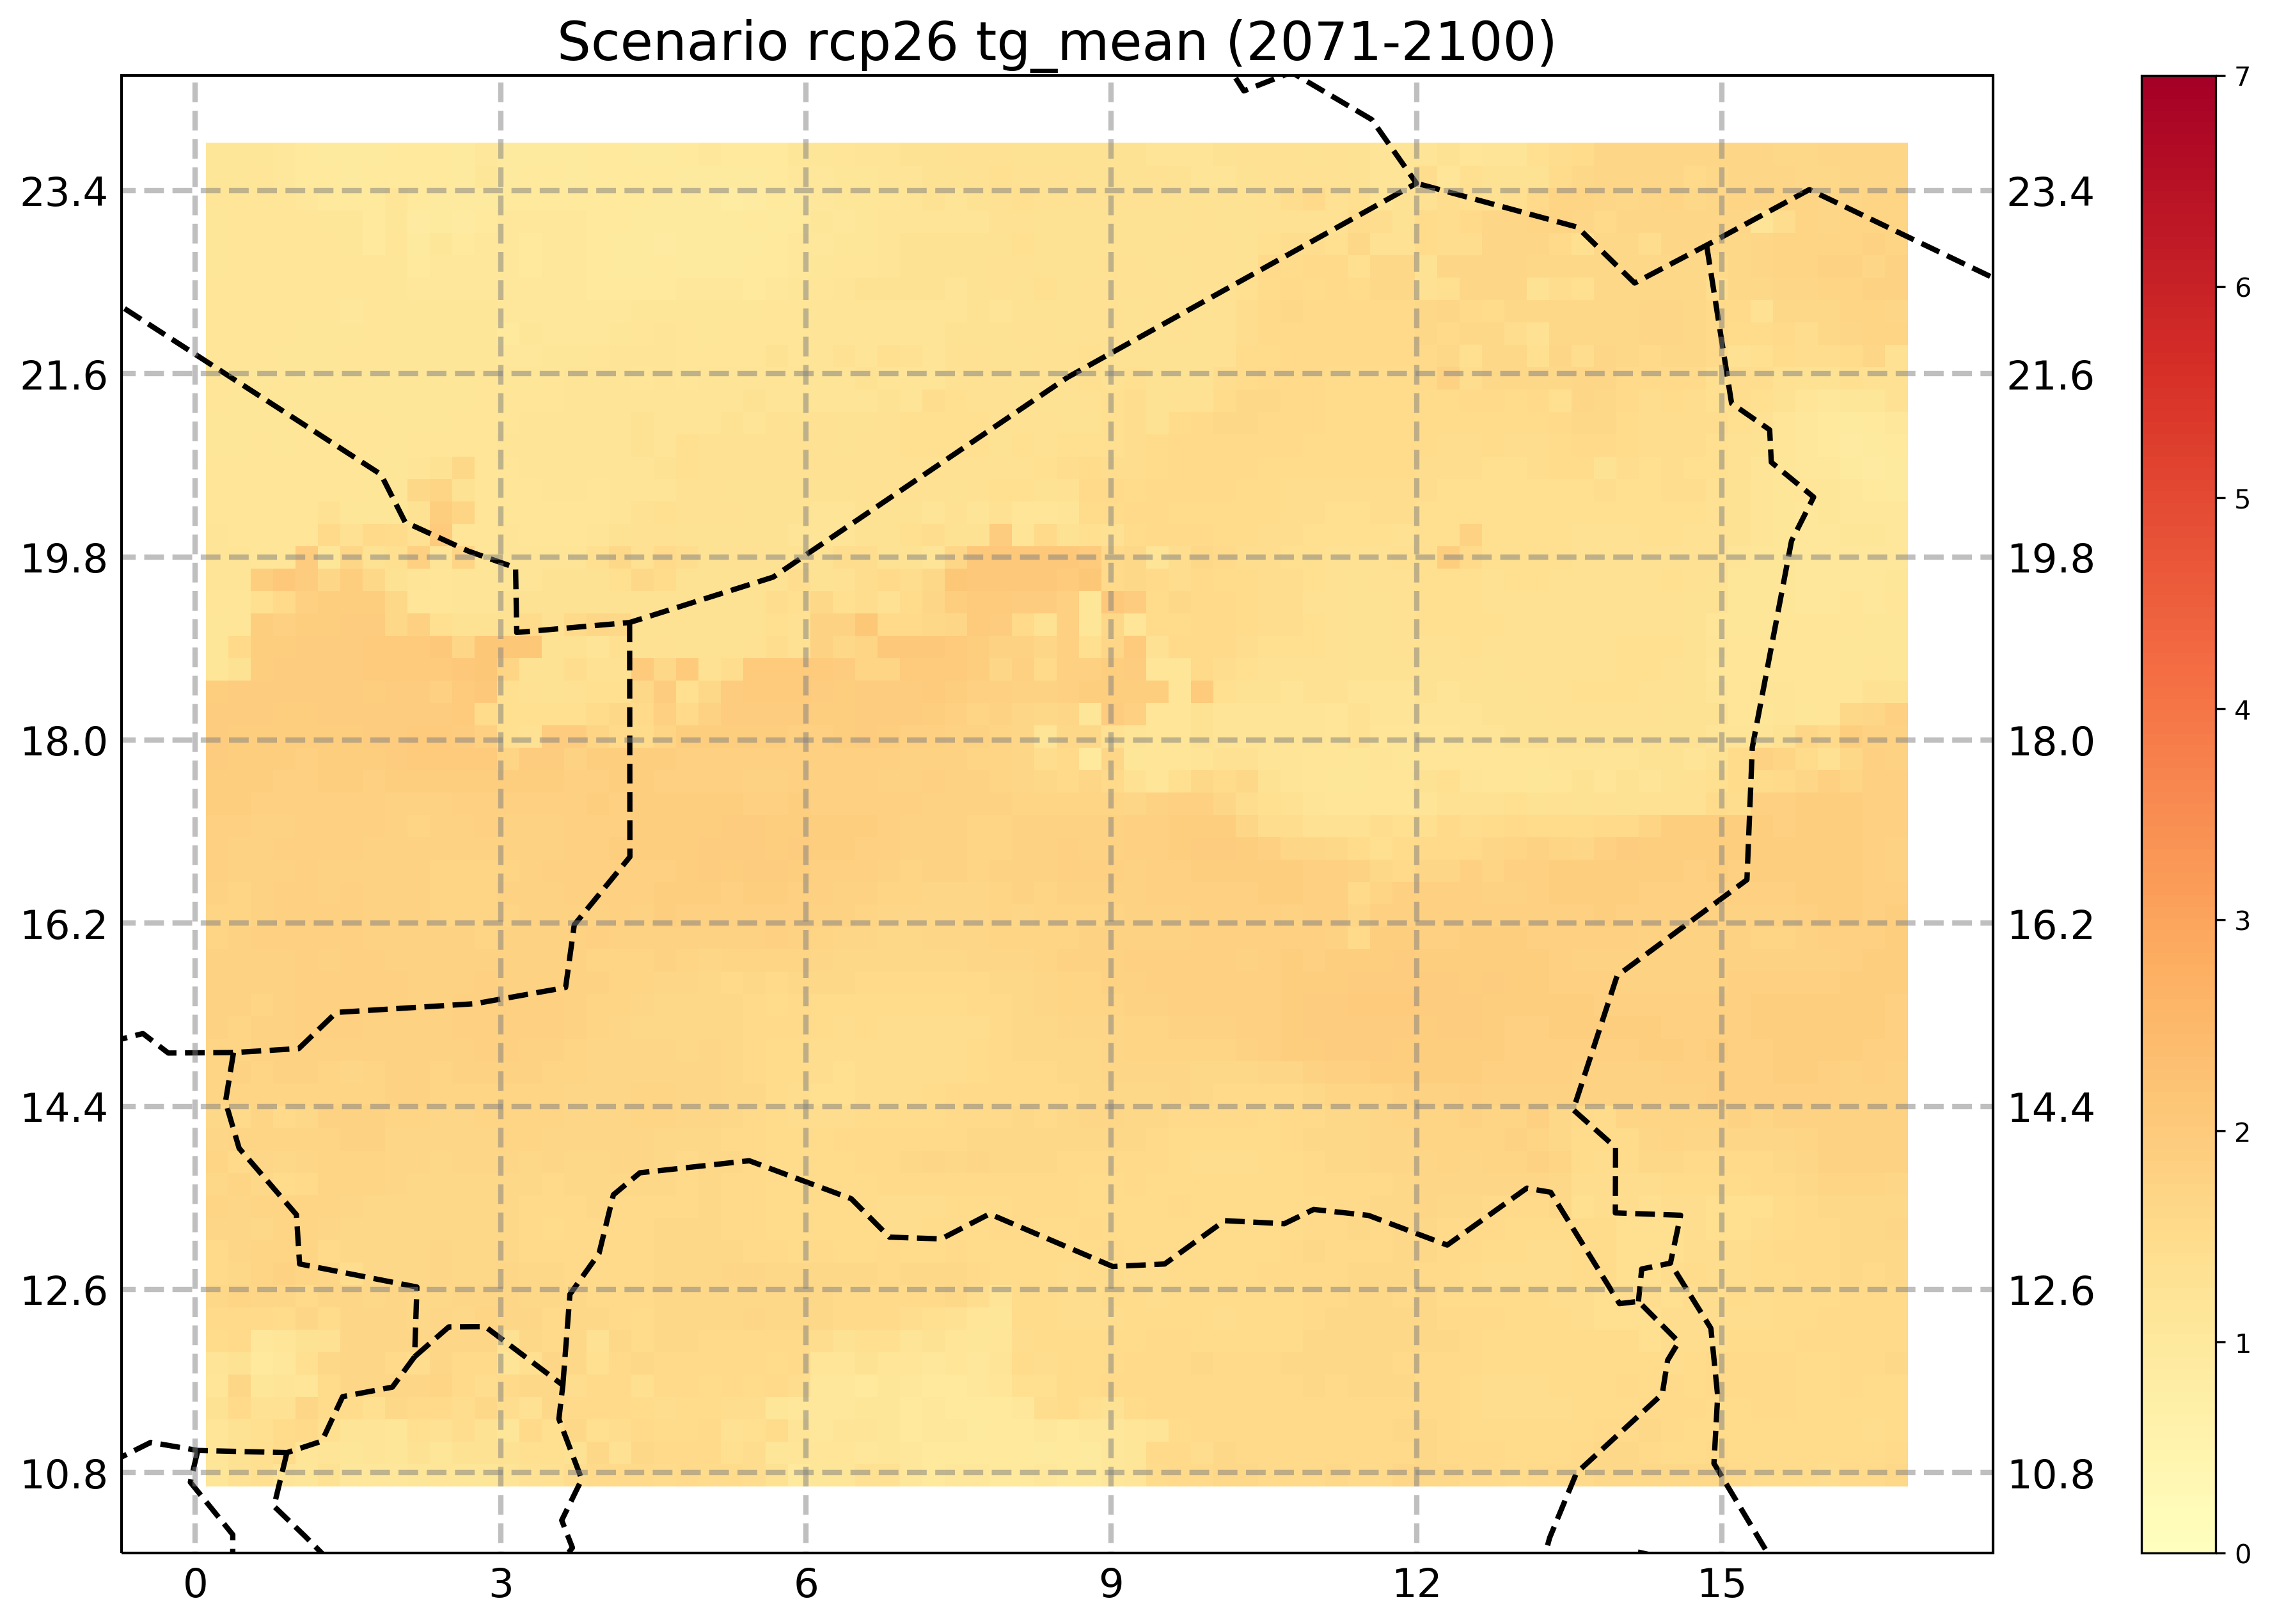

In [106]:
out_file = '/home/nils/nap_niger/pics/CCsignal_{}_{}_{}.png'.format(indicie, experiment, dateend_proj )
request.urlretrieve(out.get()[2], out_file)
Image(out_file, width=600)

In [78]:
# ref = [f for f in prInd_bbox if indicie in f and 'historical' in 
ref

['/home/nils/nap_niger/data/bbox/indices/rx1day_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/rx1day_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/rx1day_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc']

In [41]:
ref[:5]

['/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MPI-M-MPI-ESM-MRMPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7-0ICTP-RegCM4-7_v0_day_19700101-20050101.nc']

In [33]:
len(ref)

8

In [58]:
resource

['/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_GERICS-REMO2015_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_GERICS-REMO2015_v1_day_19700101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_GERICS-REMO2015_v1_day_20060101-20990101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_NCC-NorESM1-M_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_NCC-NorESM1-M_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcptot_AFR-22_MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/prcp

In [19]:
NER_indices_path =  '/home/nils/nap_niger/data/NER/indices/'
pr_indices_path =   '/home/nils/nap_niger/data/bbox/indices/'

files = [path.join(pr_indices_path, f) for f in listdir(pr_indices_path) if 'AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_mon_20060101-20991230' in f ]
         


for f in files:  
    out = fp_i.subset_countries(resource=f, region='NER') 
    while out.getStatus() != 'ProcessSucceeded': 
        time.sleep(1) # wait until the widget is 'Complete' 
    url = out.get()[1] 
    fn = path.basename(url) 
    indice_file, _ = request.urlretrieve(url, path.join(NER_indices_path,fn)) 
    indice_file

In [31]:
# fp_i.spatial_analog?

In [35]:
# niamey = '13.534,2.0918'


# ref = [f for f in prInd_bbox if '_r1i1p1_GERICS-REMO2015_v1_yr' in f and fr in f and 'historical' in f and 'rx1day' in f]
# proj = [f for f in prInd_bbox if '_r1i1p1_GERICS-REMO2015_v1_yr' in f and fr in f and experiment in f and 'rx1day' in f]

In [37]:
# out = fp_i.spatial_analog( candidate=proj,
#                     target=ref,
#                     location=niamey,
#                     indices=['rx1day'],
#                     dist='kldiv',
#                     datestartcandidate=dates[0],
#                     dateendcandidate=dates[1],
#                     datestarttarget=dates[4],
#                     dateendtarget=dates[5])


 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: method=wps_spatial_analog.py._handler, line=210, msg=Target extraction failed A subset operation on variable "time" returned empty.'}
